In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import librosa

from Practice.Chapter3.context import n_fft

# 设置中文字体
plt.rcParams["font.family"] = ["SimHei", "Times New Roman"]  # 使用系统中存在的字体（可叠加）

# 参数设置
fs = 44100          # 采样率 (Hz)
duration = 1.0      # 信号时长 (s)
f_start = 2500      # 起始频率 (Hz)
f_end = 3000        # 终止频率 (Hz)
t = np.arange(0, duration, 1/fs)  # 时间向量

ModuleNotFoundError: No module named 'Practice.Chapter3.context'

In [16]:
# 频率变化率 (Hz/s)
k = (f_end - f_start) / duration

# 瞬时相位（频率的积分）
phase = 2 * np.pi * (f_start * t + 0.5 * k * t**2)
# 生成锯齿波啁啾信号（-1到1之间）
chirp_signal = signal.sawtooth(phase)

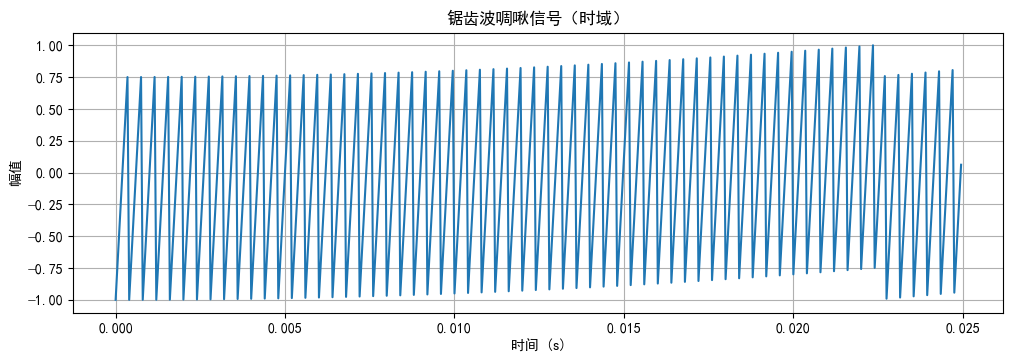

In [17]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(t[:500], chirp_signal[:500])  # 仅显示前500个样本
plt.title('锯齿波啁啾信号（时域）')
plt.xlabel('时间 (s)')
plt.ylabel('幅值')
plt.grid(True)

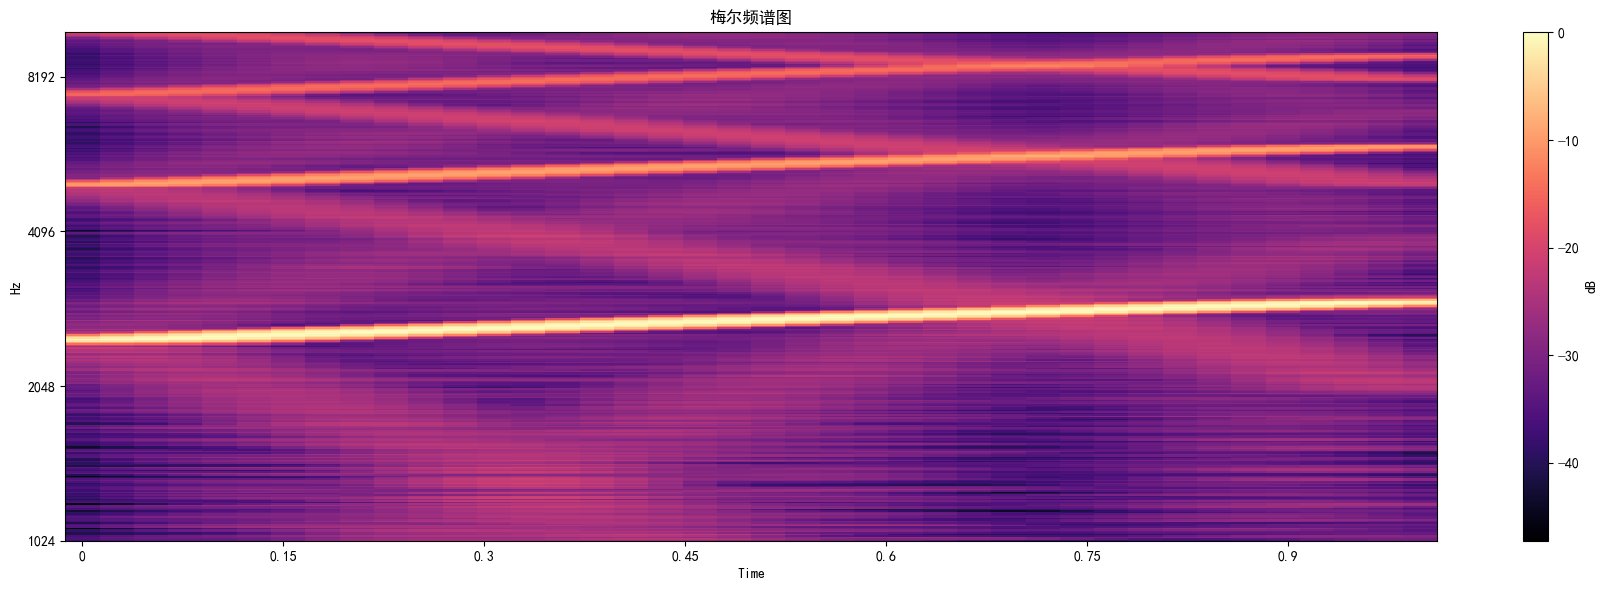

In [104]:
# 时频谱spectrogram
S = librosa.feature.melspectrogram(y=chirp_signal,sr=fs, n_fft=4096*2, n_mels=512)
# 转换为 dB 单位
S_dB = librosa.power_to_db(S, ref=np.max)

# 绘制梅尔频谱图
plt.figure(figsize=(18,6))
librosa.display.specshow(S_dB,sr=fs,x_axis='time',y_axis='mel')  # y 轴为梅尔频率
plt.colorbar(label='dB')

plt.ylim(1024, 10000)
plt.title('梅尔频谱图')
plt.tight_layout()
plt.show()